In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor


# 1

In [29]:
# Load the dataset
data = pd.read_csv('Default.csv')

RANDON_SEED = 390

# Set a random seed
np.random.seed(RANDON_SEED)

# Split the data into training and validation sets
train_data, validation_data = train_test_split(data, test_size=0.2, random_state=RANDON_SEED)

# Define the features and the target variable
X_train = train_data[['income', 'balance']]
y_train = train_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
X_validation = validation_data[['income', 'balance']]
y_validation = validation_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)

# Fit a logistic regression model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the posterior probabilities on the validation set
y_prob = model.predict_proba(X_validation)[:, 1]

# Classify individuals to the default category if the posterior probability is greater than 0.5
y_pred = (y_prob > 0.5).astype(int)

# Calculate the test error on the validation set
test_error = 1 - accuracy_score(y_validation, y_pred)

print(f'Test Error: {round(test_error, 4)}')

Test Error: 0.024


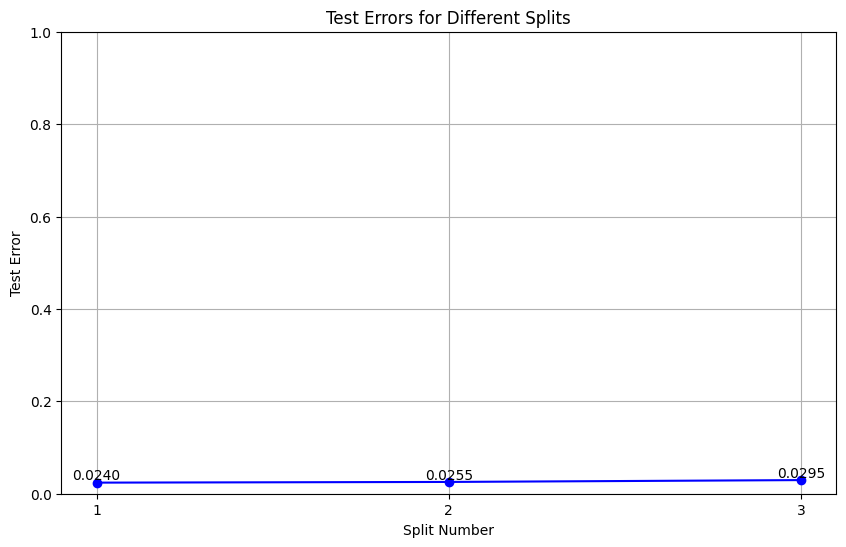

Average Test Error: 0.0263
Standard Deviation of Test Errors: 0.0023
Test Errors for each split: [0.024, 0.0255, 0.0295]


In [33]:
# Define the number of repetitions
REPEAT_TIMES = 3

# Store the test errors for each split
test_errors = []

for i in range(REPEAT_TIMES):
    # Split the data into training and validation sets
    train_data, validation_data = train_test_split(data, test_size=0.2, random_state=RANDON_SEED + i)
    
    # Define the features and the target variable
    X_train = train_data[['income', 'balance']]
    y_train = train_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    X_validation = validation_data[['income', 'balance']]
    y_validation = validation_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Fit a logistic regression model on the training set
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict the posterior probabilities on the validation set
    y_prob = model.predict_proba(X_validation)[:, 1]
    
    # Classify individuals to the default category if the posterior probability is greater than 0.5
    y_pred = (y_prob > 0.5).astype(int)
    
    # Calculate the test error on the validation set
    test_error = 1 - accuracy_score(y_validation, y_pred)
    test_errors.append(test_error)
    
    # print(f'Test Error for split {i+1}: {round(test_error, 4)}')

# Plot the test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, REPEAT_TIMES + 1), test_errors, marker='o', linestyle='-', color='b')

# Add test error values for each data point
for i, error in enumerate(test_errors):
    plt.text(i + 1, error, f'{error:.4f}', ha='center', va='bottom')

plt.title('Test Errors for Different Splits')
plt.xlabel('Split Number')
plt.ylabel('Test Error')
plt.ylim(0, 1)
plt.yticks([round(x * 0.2, 4) for x in range(0, 6, 1)])
plt.xticks(range(1, REPEAT_TIMES + 1))
plt.grid(True)
plt.show()

# Describe the findings
average_test_error = np.mean(test_errors)
print(f'Average Test Error: {round(average_test_error, 4)}')

std_test_error = np.std(test_errors)
print(f'Standard Deviation of Test Errors: {round(std_test_error, 4)}')

rounded_test_errors = [round(error, 4) for error in test_errors]
print(f'Test Errors for each split: {rounded_test_errors}')

Test Error with student for split 1: 0.0245
Test Error without student for split 1: 0.024
Test Error with student for split 2: 0.0255
Test Error without student for split 2: 0.0255
Test Error with student for split 3: 0.031
Test Error without student for split 3: 0.0295
Average Test Error with student: 0.027
Average Test Error without student: 0.0263
Standard Deviation of Test Errors with student: 0.0029
Standard Deviation of Test Errors without student: 0.0023


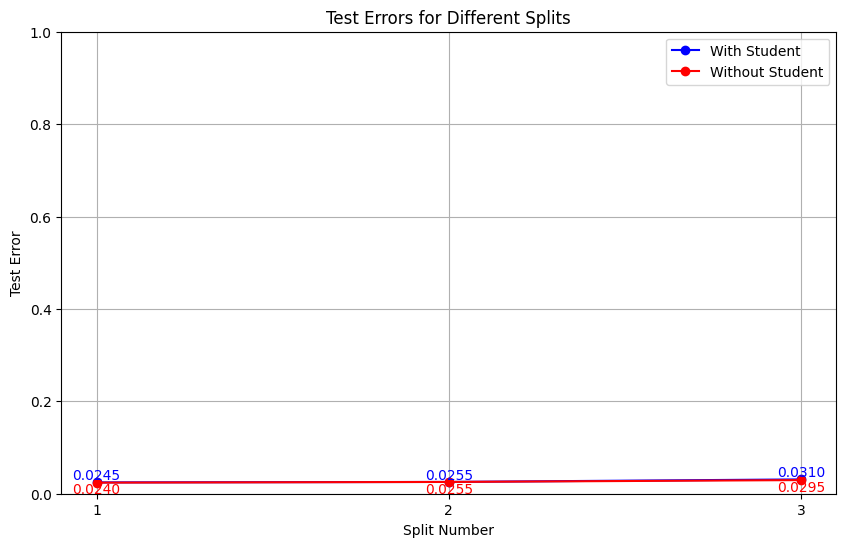

In [37]:
# Load the dataset
data = pd.read_csv('Default.csv')

# Create dummy variables for the 'student' column
data = pd.get_dummies(data, columns=['student'], drop_first=True)

# Define the number of repetitions
REPEAT_TIMES = 3

# Store the test errors for each split
test_errors_with_student = []
test_errors_without_student = []

for i in range(REPEAT_TIMES):
    # Split the data into training and validation sets
    train_data, validation_data = train_test_split(data, test_size=0.2, random_state=RANDON_SEED + i)
    
    # Define the features and the target variable
    X_train_with_student = train_data[['income', 'balance', 'student_Yes']]
    X_train_without_student = train_data[['income', 'balance']]
    y_train = train_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    X_validation_with_student = validation_data[['income', 'balance', 'student_Yes']]
    X_validation_without_student = validation_data[['income', 'balance']]
    y_validation = validation_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Fit a logistic regression model on the training set with student variable
    model_with_student = LogisticRegression()
    model_with_student.fit(X_train_with_student, y_train)
    
    # Predict the posterior probabilities on the validation set with student variable
    y_prob_with_student = model_with_student.predict_proba(X_validation_with_student)[:, 1]
    
    # Classify individuals to the default category if the posterior probability is greater than 0.5
    y_pred_with_student = (y_prob_with_student > 0.5).astype(int)
    
    # Calculate the test error on the validation set with student variable
    test_error_with_student = 1 - accuracy_score(y_validation, y_pred_with_student)
    test_errors_with_student.append(test_error_with_student)
    
    # Fit a logistic regression model on the training set without student variable
    model_without_student = LogisticRegression()
    model_without_student.fit(X_train_without_student, y_train)
    
    # Predict the posterior probabilities on the validation set without student variable
    y_prob_without_student = model_without_student.predict_proba(X_validation_without_student)[:, 1]
    
    # Classify individuals to the default category if the posterior probability is greater than 0.5
    y_pred_without_student = (y_prob_without_student > 0.5).astype(int)
    
    # Calculate the test error on the validation set without student variable
    test_error_without_student = 1 - accuracy_score(y_validation, y_pred_without_student)
    test_errors_without_student.append(test_error_without_student)
    
    print(f'Test Error with student for split {i+1}: {round(test_error_with_student, 4)}')
    print(f'Test Error without student for split {i+1}: {round(test_error_without_student, 4)}')

# Calculate average test errors
average_test_error_with_student = np.mean(test_errors_with_student)
average_test_error_without_student = np.mean(test_errors_without_student)

# Calculate standard deviation of test errors
std_test_error_with_student = np.std(test_errors_with_student)
std_test_error_without_student = np.std(test_errors_without_student)

print(f'Average Test Error with student: {round(average_test_error_with_student, 4)}')
print(f'Average Test Error without student: {round(average_test_error_without_student, 4)}')
print(f'Standard Deviation of Test Errors with student: {round(std_test_error_with_student, 4)}')
print(f'Standard Deviation of Test Errors without student: {round(std_test_error_without_student, 4)}')

# Plot the test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, REPEAT_TIMES + 1), test_errors_with_student, marker='o', linestyle='-', color='b', label='With Student')
plt.plot(range(1, REPEAT_TIMES + 1), test_errors_without_student, marker='o', linestyle='-', color='r', label='Without Student')

# Add test error values for each data point
for i, error in enumerate(test_errors_with_student):
    plt.text(i + 1, error, f'{error:.4f}', ha='center', va='bottom', color='b')
for i, error in enumerate(test_errors_without_student):
    plt.text(i + 1, error, f'{error:.4f}', ha='center', va='top', color='r')

plt.title('Test Errors for Different Splits')
plt.xlabel('Split Number')
plt.ylabel('Test Error')
plt.ylim(0, 1)
plt.yticks([round(x * 0.2, 1) for x in range(0, 6)])
plt.xticks(range(1, REPEAT_TIMES + 1))
plt.grid(True)
plt.legend()
plt.show()

# 2

βˆ0 = −15.05

βˆstudentYes = -0.5149

βˆbalance = 0.00717

βˆincome = −0.00000791

In [94]:
# Given coefficients
beta_0 = -15.05
beta_studentYes = -0.5149
beta_balance = 0.00717
beta_income = -0.00000791

In [96]:
# Given values for the student
studentYes = 1  # 1 if the customer is a student, 0 otherwise
balance = 2000
income = 45000

# Calculate the logit
logit_p = beta_0 + beta_studentYes * studentYes + beta_balance * balance + beta_income * income

# Calculate the probability
probability = 1 / (1 + np.exp(-logit_p))

print(f'The estimated probability that a student with a balance of $2,000 and income $45,000 does default on a loan is {probability:.4f}')

The estimated probability that a student with a balance of $2,000 and income $45,000 does default on a loan is 0.1707


In [97]:
# Given values for the non-student
studentYes = 0  # 1 if the customer is a student, 0 otherwise
balance = 3000
income = 70000

# Calculate the logit
logit_p = beta_0 + beta_studentYes * studentYes + beta_balance * balance + beta_income * income

# Calculate the probability
probability = 1 / (1 + np.exp(-logit_p))

print(f'The estimated probability that a non-student with a balance of $3,000 and income $70,000 does default on a loan is {probability:.4f}')

The estimated probability that a non-student with a balance of $3,000 and income $70,000 does default on a loan is 0.9973


In [98]:
# Given values for the student
studentYes = 1  # 1 if the customer is a student, 0 otherwise
balance = 2000
logit_p = -2.1972  # logit(0.10)

# Calculate the required income
income = (logit_p - beta_0 - beta_studentYes * studentYes - beta_balance * balance) / beta_income

print(f'The student would need to make an income of ${income:.2f} to have a 90% chance of getting approved for a loan.')

The student would need to make an income of $122920.35 to have a 90% chance of getting approved for a loan.


In [99]:
# Given values for the non-student
studentYes = 0  # 1 if the customer is a student, 0 otherwise
balance = 3000
logit_p = -2.1972  # logit(0.10)

# Calculate the required income
income = (logit_p - beta_0 - beta_studentYes * studentYes - beta_balance * balance) / beta_income

print(f'The non-student borrower would need to make an income of ${income:.2f} to have a 90% chance of getting approved for a loan.')

The non-student borrower would need to make an income of $1094462.71 to have a 90% chance of getting approved for a loan.


# 3

In [61]:
# Load the dataset
data = pd.read_csv('Boston.csv')

# Create a binary response variable indicating whether the crime rate is above or below the median
median_crim = data['crim'].median()
data['crim_above_median'] = (data['crim'] > median_crim).astype(int)

# List of predictors
predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

# Store the results
results = []

# Fit a simple logistic regression model for each predictor
for predictor in predictors:
    X = sm.add_constant(data[predictor])
    y = data['crim_above_median']
    model = sm.Logit(y, X).fit(disp=0)
    p_value = model.pvalues.iloc[1]  # p-value for the predictor
    results.append((predictor, p_value))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Predictor', 'p-value'])

# Determine which predictors have a statistically significant association with the response
significant_predictors = results_df[results_df['p-value'] < 0.05]

# Print the results as a table
print("Predictors with a statistically significant association (α = 0.05):")
print(results_df.to_string(index=False))

print("\nSignificant predictors:")
print(significant_predictors['Predictor'].tolist())

Predictors with a statistically significant association (α = 0.05):
Predictor      p-value
       zn 1.491829e-12
    indus 1.004798e-32
     chas 1.187845e-01
      nox 1.319223e-29
       rm 5.605110e-04
      age 1.107702e-30
      dis 7.574369e-29
      rad 4.628257e-09
      tax 7.619403e-26
  ptratio 3.091749e-08
    black 2.252362e-07
    lstat 5.879537e-20
     medv 2.004576e-08

Significant predictors:
['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


In [62]:
# Fit a multiple logistic regression model using all predictors
X = sm.add_constant(data[predictors])
y = data['crim_above_median']
multiple_model = sm.Logit(y, X).fit(disp=0)

# Print the summary of the model
print(multiple_model.summary())

# Extract and print the coefficients and p-values
coefficients = multiple_model.params
p_values = multiple_model.pvalues

print("\nCoefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

# Determine which predictors have a statistically significant association with the response
significant_predictors_multiple = p_values[p_values < 0.05].index.tolist()

print("\nSignificant predictors in the multiple logistic regression model (α = 0.05):")
print(significant_predictors_multiple)

                           Logit Regression Results                           
Dep. Variable:      crim_above_median   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.6979
Time:                        18:34:18   Log-Likelihood:                -105.96
converged:                       True   LL-Null:                       -350.73
Covariance Type:            nonrobust   LLR p-value:                 2.438e-96
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.1037      6.530     -5.223      0.000     -46.902     -21.305
zn            -0.0799      0.034     -2.369      0.018      -0.146      -0.014
indus         -0.0594      0.044     -1.358      0.1

In [63]:
# Given values for the predictors
new_data = pd.DataFrame({
    'const': [1],  # Add constant term
    'zn': [18],
    'indus': [2.97],
    'chas': [0],
    'nox': [0.4],
    'rm': [6.575],
    'age': [63],
    'dis': [4.8],
    'rad': [3],
    'tax': [238],
    'ptratio': [15.3],
    'black': [376.7],
    'lstat': [8.23],
    'medv': [45]
})

# Predict the probability of the crime rate being above the median
predicted_prob = multiple_model.predict(new_data)[0]

# Classify the suburb based on the predicted probability
classification = 'above' if predicted_prob > 0.5 else 'below'

print(f'The predicted probability that the crime rate is above the median is {predicted_prob:.4f}')
print(f'The suburb is classified as having a crime rate {classification} the median.')

The predicted probability that the crime rate is above the median is 0.0040
The suburb is classified as having a crime rate below the median.


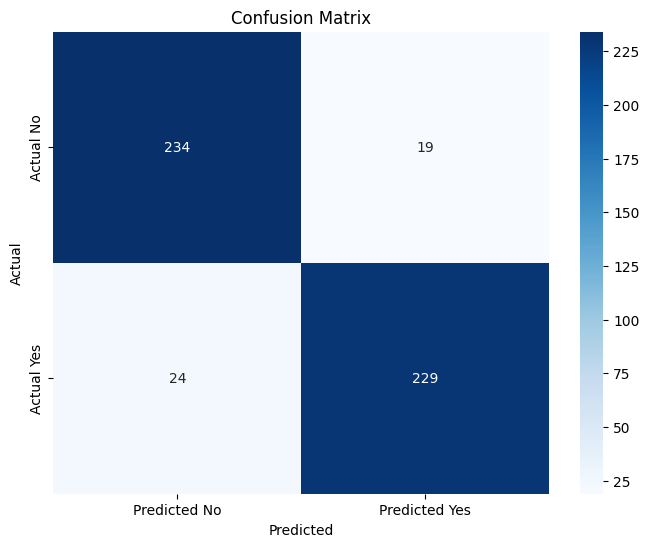


Accuracy: 0.9150
Balanced Accuracy: 0.9150
False Positives (FP): 19
False Positive Rate (FPR): 0.0751

Explanation of the Confusion Matrix:
The confusion matrix shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
TP: Correctly predicted crime rate above the median.
TN: Correctly predicted crime rate below the median.
FP: Incorrectly predicted crime rate above the median (actually below).
FN: Incorrectly predicted crime rate below the median (actually above).

True Positives (TP): 229
These are the cases where the model correctly predicted the crime rate to be above the median.

True Negatives (TN): 234
These are the cases where the model correctly predicted the crime rate to be below the median.

False Positives (FP): 19
These are the cases where the model incorrectly predicted the crime rate to be above the median, but it was actually below the median. This is also known as a Type I error.

False Negatives (FN): 24
These are t

In [71]:
# Predict the probabilities for the entire dataset
X = sm.add_constant(data[predictors])
y_true = data['crim_above_median']
y_prob = multiple_model.predict(X)

# Classify each observation based on the threshold of 0.5
y_pred = (y_prob > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_true, y_pred)

# Calculate false positives (FP) and false positive rate (FPR)
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FPR = FP / (FP + TN)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"False Positives (FP): {FP}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Explanation of the confusion matrix
print("\nExplanation of the Confusion Matrix:")
print("The confusion matrix shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).")
print("TP: Correctly predicted crime rate above the median.")
print("TN: Correctly predicted crime rate below the median.")
print("FP: Incorrectly predicted crime rate above the median (actually below).")
print("FN: Incorrectly predicted crime rate below the median (actually above).")

# Detailed explanation of the confusion matrix
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]

print(f"\nTrue Positives (TP): {TP}")
print("These are the cases where the model correctly predicted the crime rate to be above the median.")

print(f"\nTrue Negatives (TN): {TN}")
print("These are the cases where the model correctly predicted the crime rate to be below the median.")

print(f"\nFalse Positives (FP): {FP}")
print("These are the cases where the model incorrectly predicted the crime rate to be above the median, but it was actually below the median. This is also known as a Type I error.")

print(f"\nFalse Negatives (FN): {FN}")
print("These are the cases where the model incorrectly predicted the crime rate to be below the median, but it was actually above the median. This is also known as a Type II error.")

print("\nSummary of Mistakes:")
print(f"The model made {FP} false positive(s) and {FN} false negative(s).")
print(f"The false positive rate (FPR) is {FPR:.4f}, indicating the proportion of actual negatives that were incorrectly classified as positives.")

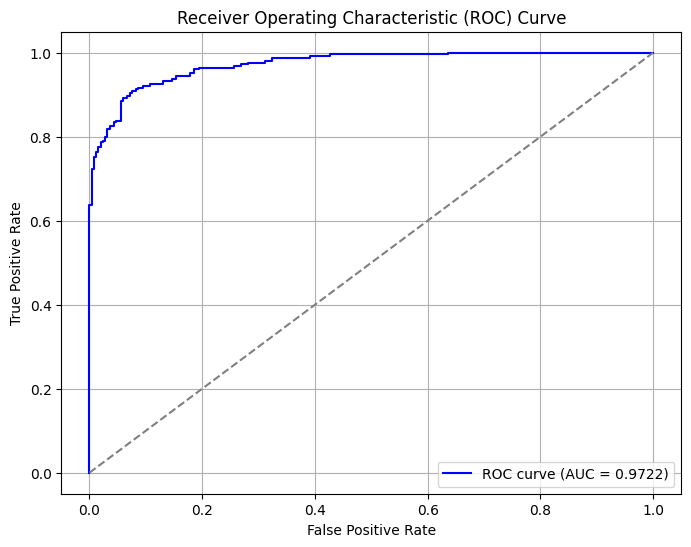

The AUC (Area Under the Curve) is 0.9722


In [74]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Compute the AUC
auc = roc_auc_score(y_true, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"The AUC (Area Under the Curve) is {auc:.4f}")

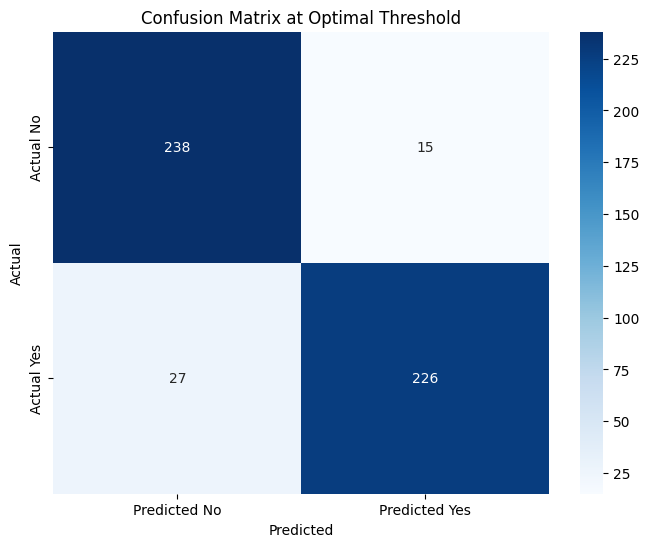

Optimal Threshold: 0.5840

Accuracy at Optimal Threshold: 0.9170
Balanced Accuracy at Optimal Threshold: 0.9170
False Positives (FP) at Optimal Threshold: 15
False Positive Rate (FPR) at Optimal Threshold: 0.0593

True Positives (TP) at Optimal Threshold: 226
True Negatives (TN) at Optimal Threshold: 238
False Positives (FP) at Optimal Threshold: 15
False Negatives (FN) at Optimal Threshold: 27


In [80]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Compute the value of (TP rate + (1 - FP rate)) for each threshold
optimal_threshold_index = np.argmax(tpr + (1 - fpr))
optimal_threshold = thresholds[optimal_threshold_index]

# Classify each observation based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Compute the confusion matrix
conf_matrix_optimal = confusion_matrix(y_true, y_pred_optimal)

# Calculate accuracy
accuracy_optimal = accuracy_score(y_true, y_pred_optimal)

# Calculate balanced accuracy
balanced_acc_optimal = balanced_accuracy_score(y_true, y_pred_optimal)

# Calculate false positives (FP) and false positive rate (FPR)
FP_optimal = conf_matrix_optimal[0, 1]
TN_optimal = conf_matrix_optimal[0, 0]
FPR_optimal = FP_optimal / (FP_optimal + TN_optimal)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix at Optimal Threshold')
plt.show()

# Print the optimal threshold value
print(f"Optimal Threshold: {optimal_threshold:.4f}")

print(f"\nAccuracy at Optimal Threshold: {accuracy_optimal:.4f}")
print(f"Balanced Accuracy at Optimal Threshold: {balanced_acc_optimal:.4f}")
print(f"False Positives (FP) at Optimal Threshold: {FP_optimal}")
print(f"False Positive Rate (FPR) at Optimal Threshold: {FPR_optimal:.4f}")

# Explanation of the confusion matrix at optimal threshold
TP_optimal = conf_matrix_optimal[1, 1]
FN_optimal = conf_matrix_optimal[1, 0]

print(f"\nTrue Positives (TP) at Optimal Threshold: {TP_optimal}")
print(f"True Negatives (TN) at Optimal Threshold: {TN_optimal}")
print(f"False Positives (FP) at Optimal Threshold: {FP_optimal}")
print(f"False Negatives (FN) at Optimal Threshold: {FN_optimal}")

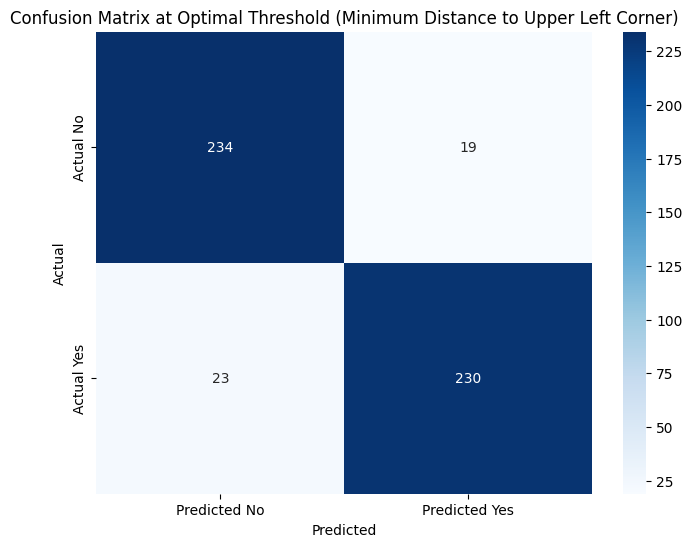

Optimal Threshold (minimum distance to upper left corner): 0.4971

Accuracy at Optimal Threshold: 0.9170
Balanced Accuracy at Optimal Threshold: 0.9170
False Positives (FP) at Optimal Threshold: 19
False Positive Rate (FPR) at Optimal Threshold: 0.0751

True Positives (TP) at Optimal Threshold: 230
True Negatives (TN) at Optimal Threshold: 234
False Positives (FP) at Optimal Threshold: 19
False Negatives (FN) at Optimal Threshold: 23


In [82]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Compute the distance to the upper left corner for each threshold
distances = np.sqrt((1 - tpr)**2 + fpr**2)
optimal_threshold_index = np.argmin(distances)
optimal_threshold = thresholds[optimal_threshold_index]

# Classify each observation based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Compute the confusion matrix
conf_matrix_optimal = confusion_matrix(y_true, y_pred_optimal)

# Calculate accuracy
accuracy_optimal = accuracy_score(y_true, y_pred_optimal)

# Calculate balanced accuracy
balanced_acc_optimal = balanced_accuracy_score(y_true, y_pred_optimal)

# Calculate false positives (FP) and false positive rate (FPR)
FP_optimal = conf_matrix_optimal[0, 1]
TN_optimal = conf_matrix_optimal[0, 0]
FPR_optimal = FP_optimal / (FP_optimal + TN_optimal)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix at Optimal Threshold (Minimum Distance to Upper Left Corner)')
plt.show()

# Print the optimal threshold value
print(f"Optimal Threshold (minimum distance to upper left corner): {optimal_threshold:.4f}")

print(f"\nAccuracy at Optimal Threshold: {accuracy_optimal:.4f}")
print(f"Balanced Accuracy at Optimal Threshold: {balanced_acc_optimal:.4f}")
print(f"False Positives (FP) at Optimal Threshold: {FP_optimal}")
print(f"False Positive Rate (FPR) at Optimal Threshold: {FPR_optimal:.4f}")

# Explanation of the confusion matrix at optimal threshold
TP_optimal = conf_matrix_optimal[1, 1]
FN_optimal = conf_matrix_optimal[1, 0]

print(f"\nTrue Positives (TP) at Optimal Threshold: {TP_optimal}")
print(f"True Negatives (TN) at Optimal Threshold: {TN_optimal}")
print(f"False Positives (FP) at Optimal Threshold: {FP_optimal}")
print(f"False Negatives (FN) at Optimal Threshold: {FN_optimal}")

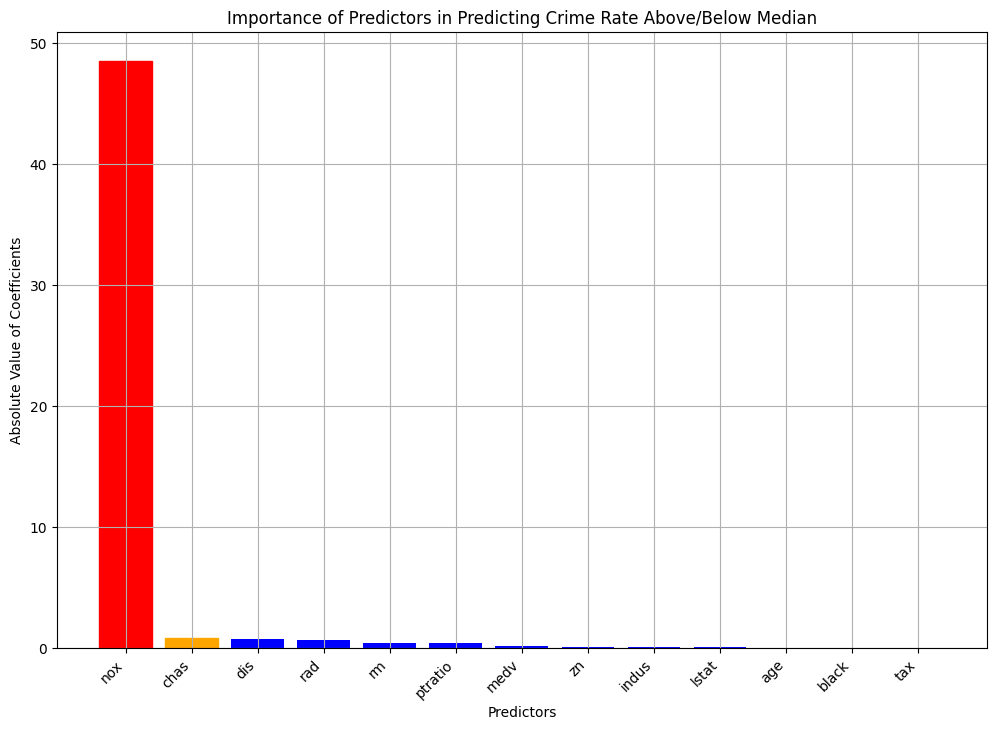

Coefficients of the predictors:
         Coefficient  Absolute Value
nox        48.523782       48.523782
chas        0.785327        0.785327
dis         0.691400        0.691400
rad         0.656465        0.656465
rm         -0.425596        0.425596
ptratio     0.368716        0.368716
medv        0.167130        0.167130
zn         -0.079918        0.079918
indus      -0.059389        0.059389
lstat       0.043862        0.043862
age         0.022172        0.022172
black      -0.013524        0.013524
tax        -0.006412        0.006412

The most important variable is: nox with an absolute coefficient value of 48.5238
The second most important variable is: chas with an absolute coefficient value of 0.7853


In [86]:
# Extract the coefficients from the multiple logistic regression model
coefficients = multiple_model.params

# Exclude the intercept (constant term)
coefficients = coefficients.drop('const')

# Find the absolute values of the coefficients
abs_coefficients = coefficients.abs()

# Sort the coefficients by their absolute values in descending order
sorted_coefficients = abs_coefficients.sort_values(ascending=False)

# Get the first and second most important variables
most_important_variable = sorted_coefficients.index[0]
second_most_important_variable = sorted_coefficients.index[1]

# Create a DataFrame to display the coefficients and their absolute values
coefficients_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Absolute Value': abs_coefficients
})

# Sort the DataFrame by the absolute values of the coefficients
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Value', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_coefficients_df.index, sorted_coefficients_df['Absolute Value'], color='blue')

# Highlight the two most important variables
bars[0].set_color('red')
bars[1].set_color('orange')

plt.xlabel('Predictors')
plt.ylabel('Absolute Value of Coefficients')
plt.title('Importance of Predictors in Predicting Crime Rate Above/Below Median')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Print the sorted coefficients DataFrame
print("Coefficients of the predictors:")
print(sorted_coefficients_df)

# Print the most important and second most important variables with their values
most_important_variable = sorted_coefficients_df.index[0]
second_most_important_variable = sorted_coefficients_df.index[1]

most_important_value = sorted_coefficients_df.iloc[0]['Absolute Value']
second_most_important_value = sorted_coefficients_df.iloc[1]['Absolute Value']

print(f"\nThe most important variable is: {most_important_variable} with an absolute coefficient value of {most_important_value:.4f}")
print(f"The second most important variable is: {second_most_important_variable} with an absolute coefficient value of {second_most_important_value:.4f}")

In [87]:
# Extract the first two most important variables
most_important_variable = sorted_coefficients_df.index[0]
second_most_important_variable = sorted_coefficients_df.index[1]

# Fit a multiple logistic regression model using the first two most important variables
X_important = sm.add_constant(data[[most_important_variable, second_most_important_variable]])
y = data['crim_above_median']
model_important = sm.Logit(y, X_important).fit(disp=0)

# Extract the coefficients
coefficients_important = model_important.params

# Write out the model in equation form
intercept = coefficients_important['const']
coef_most_important = coefficients_important[most_important_variable]
coef_second_most_important = coefficients_important[second_most_important_variable]

print("Logistic Regression Model Equation:")
print(f"logit(p) = {intercept:.4f} + {coef_most_important:.4f} * {most_important_variable} + {coef_second_most_important:.4f} * {second_most_important_variable}")

Logistic Regression Model Equation:
logit(p) = -16.1118 + 29.7958 * nox + 0.8756 * chas


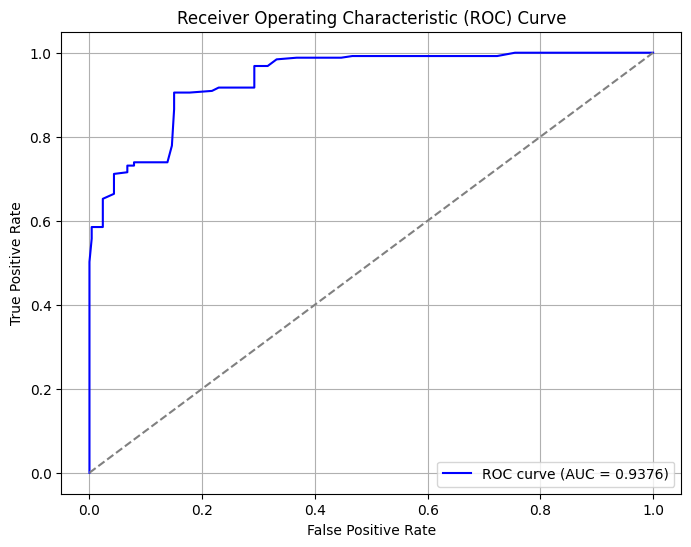

The AUC (Area Under the Curve) is 0.9376


In [88]:
# Predict the probabilities for the entire dataset using the model with the two most important variables
y_prob_important = model_important.predict(X_important)

# Compute the ROC curve
fpr_important, tpr_important, thresholds_important = roc_curve(y, y_prob_important)

# Compute the AUC
auc_important = roc_auc_score(y, y_prob_important)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_important, tpr_important, color='blue', label=f'ROC curve (AUC = {auc_important:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"The AUC (Area Under the Curve) is {auc_important:.4f}")

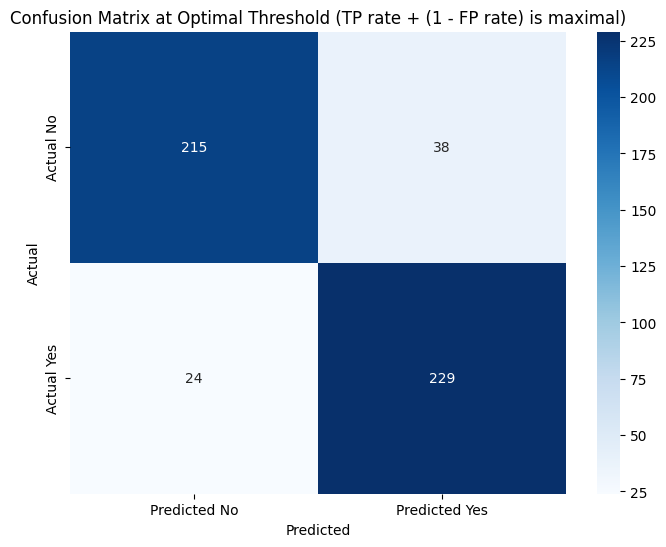

Optimal Threshold (TP rate + (1 - FP rate) is maximal): 0.4352

Accuracy at Optimal Threshold: 0.8775
Balanced Accuracy at Optimal Threshold: 0.8775
False Positives (FP) at Optimal Threshold: 38
False Positive Rate (FPR) at Optimal Threshold: 0.1502

True Positives (TP) at Optimal Threshold: 229
True Negatives (TN) at Optimal Threshold: 215
False Positives (FP) at Optimal Threshold: 38
False Negatives (FN) at Optimal Threshold: 24


In [90]:
# Compute the ROC curve
fpr_important, tpr_important, thresholds_important = roc_curve(y, y_prob_important)

# Compute the value of (TP rate + (1 - FP rate)) for each threshold
optimal_threshold_index_important = np.argmax(tpr_important + (1 - fpr_important))
optimal_threshold_important = thresholds_important[optimal_threshold_index_important]

# Classify each observation based on the optimal threshold
y_pred_optimal_important = (y_prob_important >= optimal_threshold_important).astype(int)

# Compute the confusion matrix
conf_matrix_optimal_important = confusion_matrix(y, y_pred_optimal_important)

# Calculate accuracy
accuracy_optimal_important = accuracy_score(y, y_pred_optimal_important)

# Calculate balanced accuracy
balanced_acc_optimal_important = balanced_accuracy_score(y, y_pred_optimal_important)

# Calculate false positives (FP) and false positive rate (FPR)
FP_optimal_important = conf_matrix_optimal_important[0, 1]
TN_optimal_important = conf_matrix_optimal_important[0, 0]
FPR_optimal_important = FP_optimal_important / (FP_optimal_important + TN_optimal_important)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimal_important, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix at Optimal Threshold (TP rate + (1 - FP rate) is maximal)')
plt.show()

# Print the optimal threshold value
print(f"Optimal Threshold (TP rate + (1 - FP rate) is maximal): {optimal_threshold_important:.4f}")

print(f"\nAccuracy at Optimal Threshold: {accuracy_optimal_important:.4f}")
print(f"Balanced Accuracy at Optimal Threshold: {balanced_acc_optimal_important:.4f}")
print(f"False Positives (FP) at Optimal Threshold: {FP_optimal_important}")
print(f"False Positive Rate (FPR) at Optimal Threshold: {FPR_optimal_important:.4f}")

# Explanation of the confusion matrix at optimal threshold
TP_optimal_important = conf_matrix_optimal_important[1, 1]
FN_optimal_important = conf_matrix_optimal_important[1, 0]

print(f"\nTrue Positives (TP) at Optimal Threshold: {TP_optimal_important}")
print(f"True Negatives (TN) at Optimal Threshold: {TN_optimal_important}")
print(f"False Positives (FP) at Optimal Threshold: {FP_optimal_important}")
print(f"False Negatives (FN) at Optimal Threshold: {FN_optimal_important}")

# 4

In [100]:
# Given probabilities
probabilities = [0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]

# Convert probabilities to class predictions (1 for Red, 0 for not Red)
class_predictions = [1 if prob > 0.5 else 0 for prob in probabilities]

# Determine the final classification by majority vote
final_class_majority_vote = 1 if np.sum(class_predictions) > len(class_predictions) / 2 else 0

print(f"Final classification under the majority vote approach: {'Red' if final_class_majority_vote == 1 else 'Not Red'}")

Final classification under the majority vote approach: Red


In [101]:
# Given probabilities
probabilities = [0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]

# Calculate the average probability
average_probability = np.mean(probabilities)

# Determine the final classification based on the average probability
final_class_average_probability = 1 if average_probability > 0.5 else 0

print(f"Final classification under the average probability approach: {'Red' if final_class_average_probability == 1 else 'Not Red'}")

Final classification under the average probability approach: Not Red


# 5

In [111]:
# Load the dataset
data = pd.read_csv('Carseats.csv')

# Print the first few rows of the dataset
# print(data.head())

# Ordinal encoding for "ShelveLoc"
shelveloc_mapping = {'Bad': 0, 'Medium': 1, 'Good': 2}
data['ShelveLoc'] = data['ShelveLoc'].map(shelveloc_mapping)

# Label encoding for "Urban" and "US"
label_encoder = LabelEncoder()
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

# Split the data into training (75%) and test (25%) sets
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

# Print the sizes of the training and test sets
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

# Print the first few rows of the preprocessed dataset
print(data.head())

Training set size: 300
Test set size: 100
   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          2   65   
2  10.06        113      35           10         269     80          1   59   
3   7.40        117     100            4         466     97          1   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0  


Mean Squared Error on the test set: 4.6915


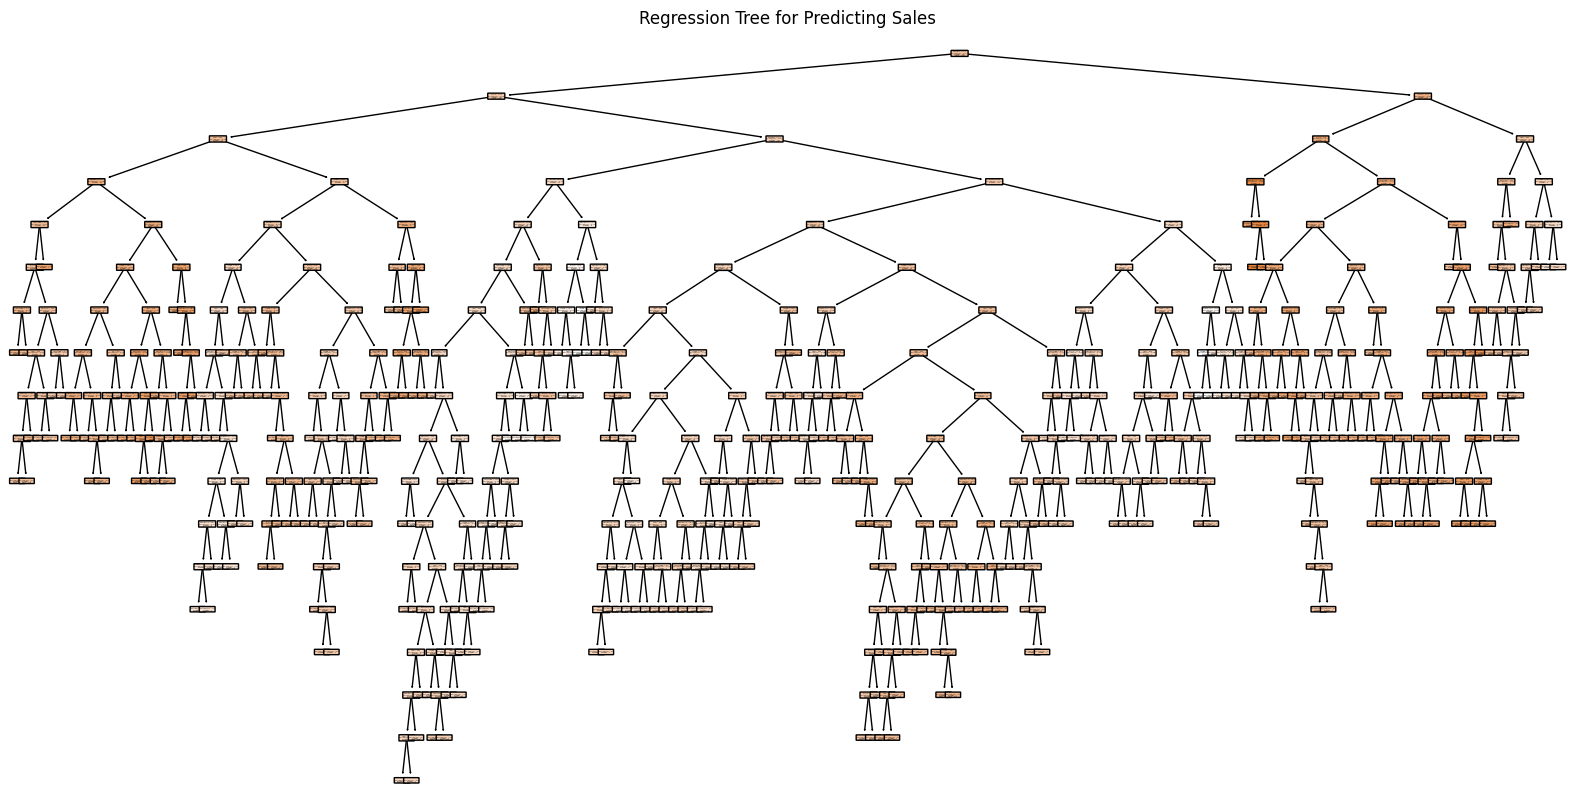

In [114]:
# Define the features and the target variable
X_train = train_data.drop(columns=['Sales'])
y_train = train_data['Sales']
X_test = test_data.drop(columns=['Sales'])
y_test = test_data['Sales']

# Fit a regression tree model
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = reg_tree.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse:.4f}")

# Plot the regression tree
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Regression Tree for Predicting Sales")
plt.show()

In [115]:
# Summary statistics of Sales
sales_summary = data['Sales'].describe()
print("Summary Statistics of Sales:")
print(sales_summary)

# Baseline model performance (predicting the mean Sales for all observations)
mean_sales = y_train.mean()
baseline_predictions = [mean_sales] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
print(f"\nBaseline Mean Squared Error (predicting mean Sales): {baseline_mse:.4f}")

Summary Statistics of Sales:
count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

Baseline Mean Squared Error (predicting mean Sales): 9.3713


In [ ]:
# Define the parameter grid for max_depth
param_grid = {'max_depth': range(1, 21)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_tree = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_tree.predict(X_test)

# Calculate the mean squared error for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Test MSE with the best model: {mse_best:.4f}")

# Compare with the original unpruned tree
y_pred_unpruned = reg_tree.predict(X_test)
mse_unpruned = mean_squared_error(y_test, y_pred_unpruned)
print(f"Test MSE with the unpruned tree: {mse_unpruned:.4f}")

Best max_depth: 12
Test MSE with the best model: 4.5046
Test MSE with the unpruned tree: 4.6915


In [123]:
# Define the features and the target variable
X_train = train_data.drop(columns=['Sales'])
y_train = train_data['Sales']
X_test = test_data.drop(columns=['Sales'])
y_test = test_data['Sales']

# Fit a bagging regressor
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=100, random_state=42)
bagging_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_regressor.predict(X_test)

# Calculate the mean squared error
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print(f"Test MSE with bagging: {mse_bagging:.4f}")

# Determine the importance of each variable
# The feature importances are averaged over all the trees in the ensemble
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_regressor.estimators_], axis=0)

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importances_df)

Test MSE with bagging: 2.7287
Feature Importances:
       Feature  Importance
4        Price    0.316646
5    ShelveLoc    0.250792
6          Age    0.116037
0    CompPrice    0.100662
2  Advertising    0.079439
1       Income    0.048159
3   Population    0.043403
7    Education    0.029808
8        Urban    0.008217
9           US    0.006836


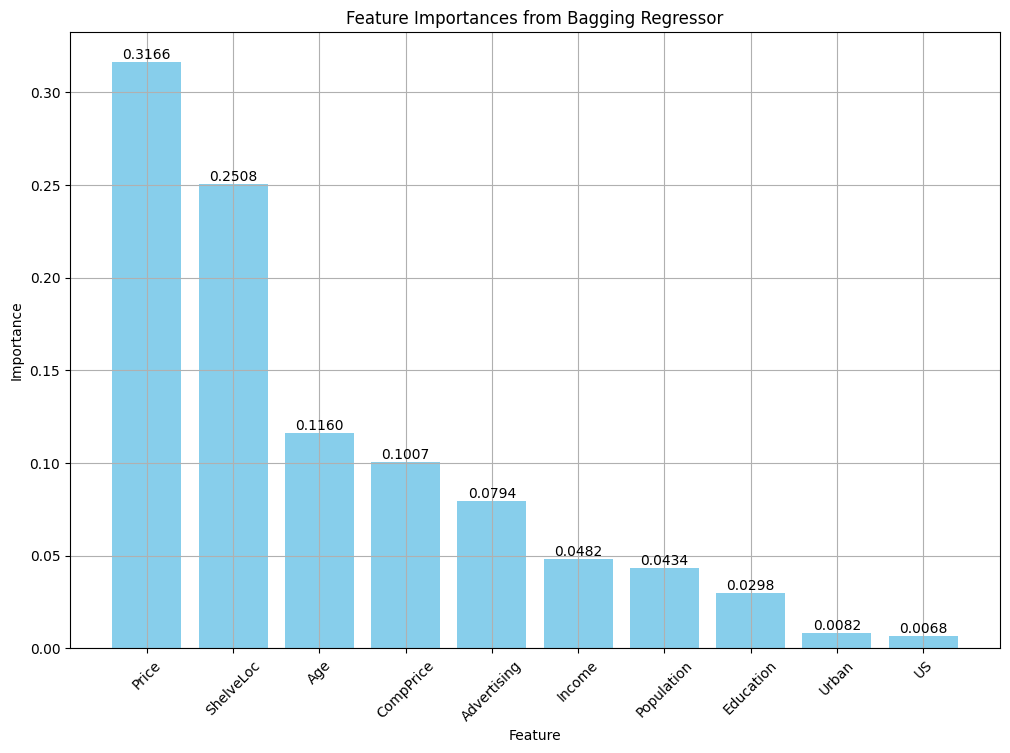

In [128]:
# Plot the feature importances as a vertical bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Bagging Regressor')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

Test MSE with random forests: 2.7520
Feature Importances from Random Forests:
       Feature  Importance
4        Price    0.317257
5    ShelveLoc    0.250954
6          Age    0.115936
0    CompPrice    0.100673
2  Advertising    0.078318
1       Income    0.049618
3   Population    0.043853
7    Education    0.029057
8        Urban    0.007915
9           US    0.006420


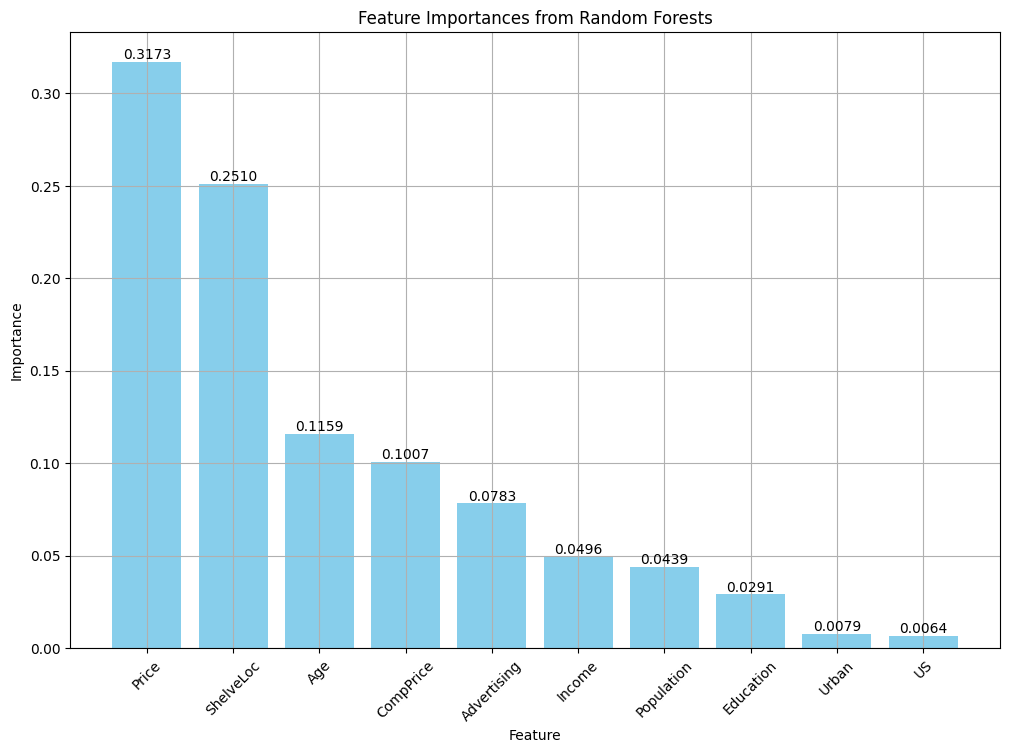

In [138]:
# Fit a random forest regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_regressor.predict(X_test)

# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Test MSE with random forests: {mse_rf:.4f}")

# Determine the importance of each variable
feature_importances_rf = random_forest_regressor.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances from Random Forests:")
print(feature_importances_rf_df)

# Plot the feature importances as a vertical bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(feature_importances_rf_df['Feature'], feature_importances_rf_df['Importance'], color='skyblue')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forests')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

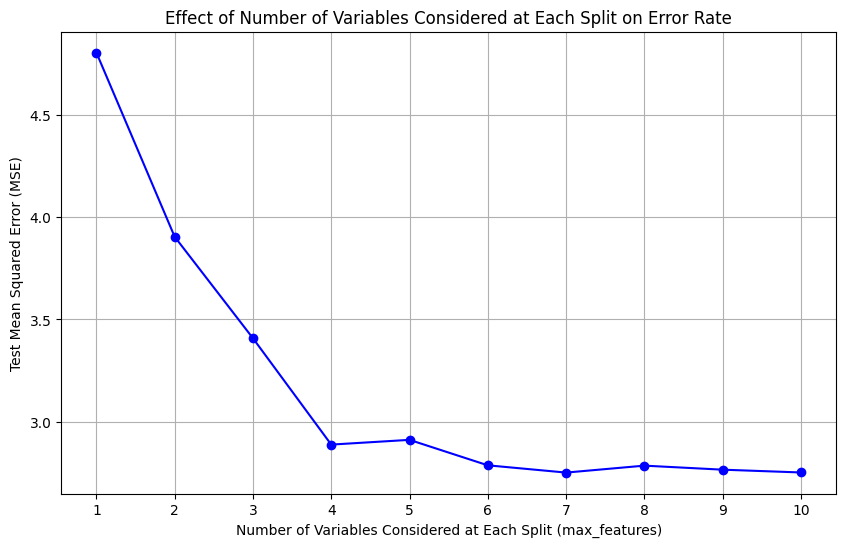

max_features = 1: Test MSE = 4.8031
max_features = 2: Test MSE = 3.9034
max_features = 3: Test MSE = 3.4077
max_features = 4: Test MSE = 2.8881
max_features = 5: Test MSE = 2.9113
max_features = 6: Test MSE = 2.7869
max_features = 7: Test MSE = 2.7514
max_features = 8: Test MSE = 2.7853
max_features = 9: Test MSE = 2.7656
max_features = 10: Test MSE = 2.7520


In [ ]:
# List of max_features values to consider
max_features_values = range(1, X_train.shape[1] + 1)

# Store the test MSE for each value of max_features
test_mse_values = []

for max_features in max_features_values:
    # Fit a Random Forest model
    rf = RandomForestRegressor(n_estimators=100, max_features=max_features, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    test_mse_values.append(mse)

# Plot the test MSE against the number of variables considered at each split
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, test_mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Variables Considered at Each Split (max_features)')
plt.ylabel('Test Mean Squared Error (MSE)')
plt.title('Effect of Number of Variables Considered at Each Split on Error Rate')
plt.xticks(max_features_values)  # Set x-ticks to start from 1 and increment by 1
plt.grid(True)
plt.show()

# Print the test MSE values for each max_features
for max_features, mse in zip(max_features_values, test_mse_values):
    print(f"max_features = {max_features}: Test MSE = {mse:.4f}")

# 6